# COM S 474/574 Spring 2024
# 4.1 Linear Regression
## Gabriel Ferreira(gabferre@iastate.edu)

### - The Real Estate Dataset

- data source: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction/
- a local copy is saved as "data/Real_estate.csv"

In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read and print the data set
real_estate_data = pd.read_csv("../data/Real_estate.csv")
print (real_estate_data.shape)
real_estate_data.head()

(414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


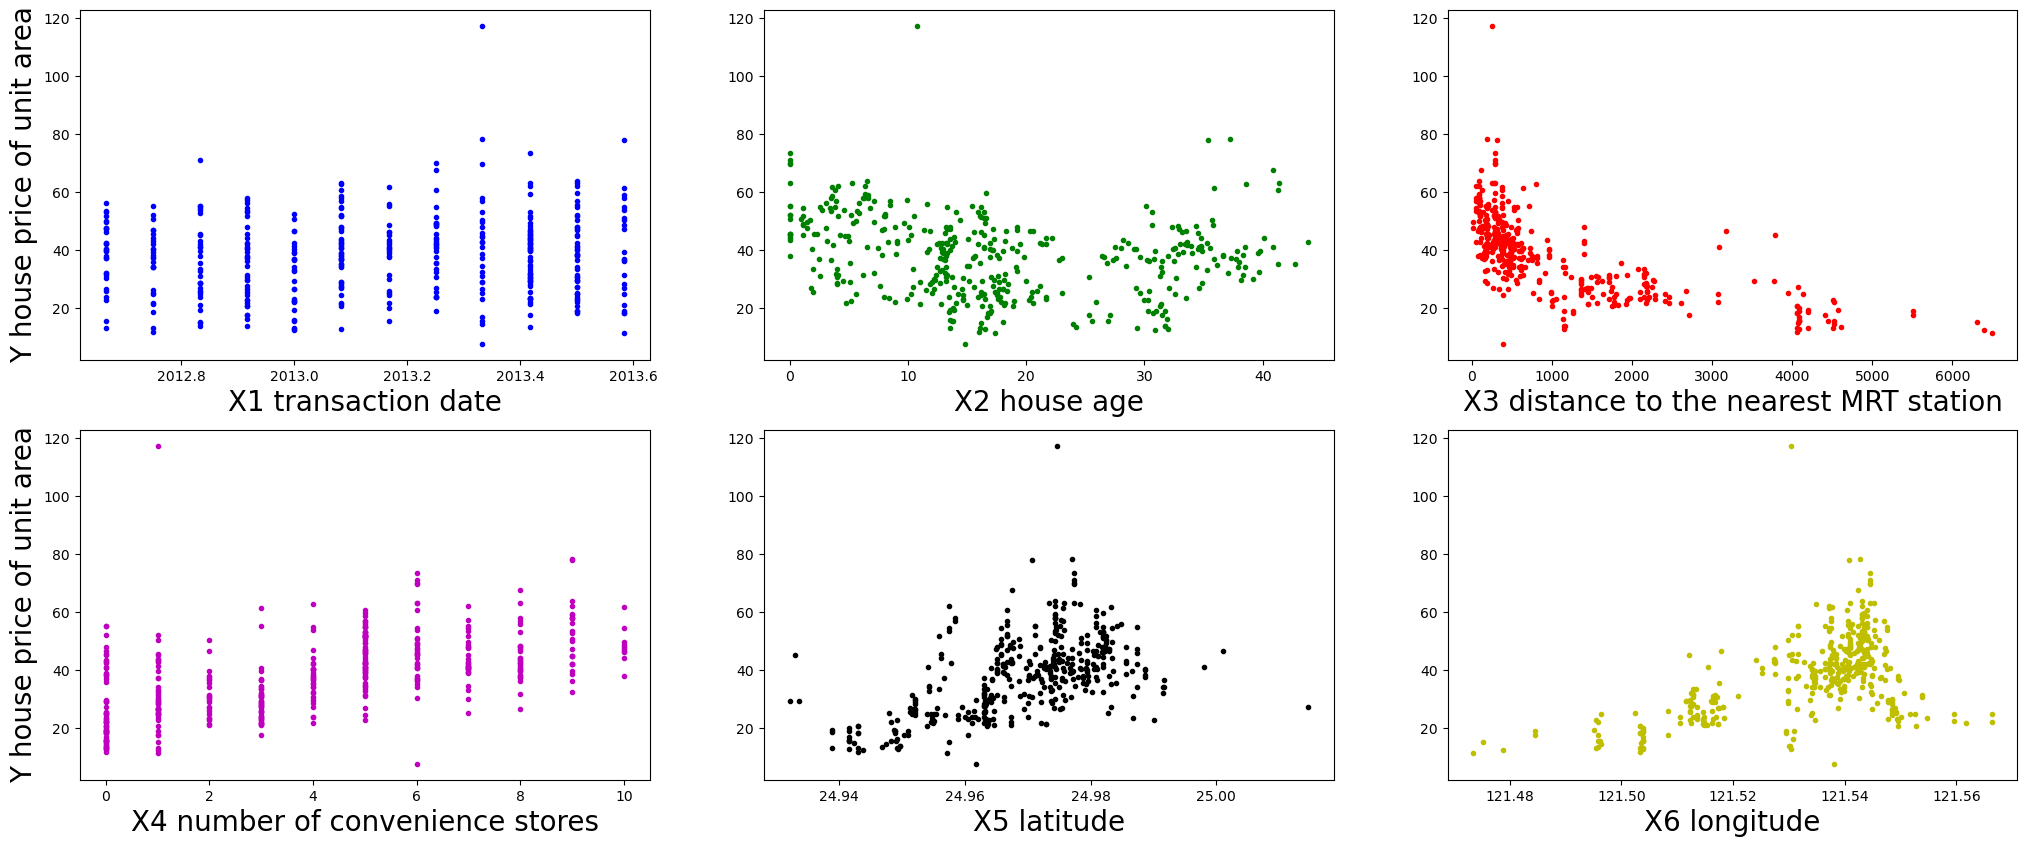

In [5]:
fig, axs = plt.subplots(2,3, figsize=(25,10))
ft_size = 20
axs[0][0].plot(real_estate_data["X1 transaction date"], real_estate_data["Y house price of unit area"], "b.")
axs[0][0].set_xlabel("X1 transaction date",fontsize=ft_size)
axs[0][1].plot(real_estate_data["X2 house age"], real_estate_data["Y house price of unit area"], "g.")
axs[0][1].set_xlabel("X2 house age",fontsize=ft_size)
axs[0][2].plot(real_estate_data["X3 distance to the nearest MRT station"], real_estate_data["Y house price of unit area"], "r.")
axs[0][2].set_xlabel("X3 distance to the nearest MRT station",fontsize=ft_size)
axs[1][0].plot(real_estate_data["X4 number of convenience stores"], real_estate_data["Y house price of unit area"], "m.")
axs[1][0].set_xlabel("X4 number of convenience stores",fontsize=ft_size)
axs[1][1].plot(real_estate_data["X5 latitude"], real_estate_data["Y house price of unit area"], "k.")
axs[1][1].set_xlabel("X5 latitude",fontsize=ft_size)
axs[1][2].plot(real_estate_data["X6 longitude"], real_estate_data["Y house price of unit area"], "y.")
axs[1][2].set_xlabel("X6 longitude",fontsize=ft_size)
for i in range(2):
    axs[i][0].set_ylabel("Y house price of unit area",fontsize=ft_size)

Text(0.5, 0, 'Y house price of unit area')

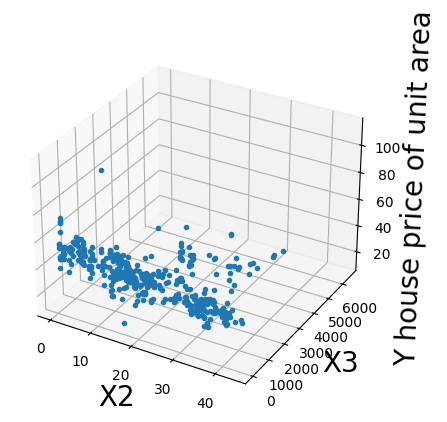

In [4]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(real_estate_data["X2 house age"], 
        real_estate_data["X3 distance to the nearest MRT station"], 
        real_estate_data["Y house price of unit area"], ".")
ax.set_xlabel("X2", fontsize=ft_size)
ax.set_ylabel("X3", fontsize=ft_size)
ax.set_zlabel("Y house price of unit area", fontsize=ft_size)

### Single-variable Linear Model

- There can be many machine learning techniques & topics studied with this data set
- Let's focus on **house price prediction** for this lecture
- Consider the single variable case as a start point

A single-variable linear function takes the form as
$$
  y = ax + b
$$


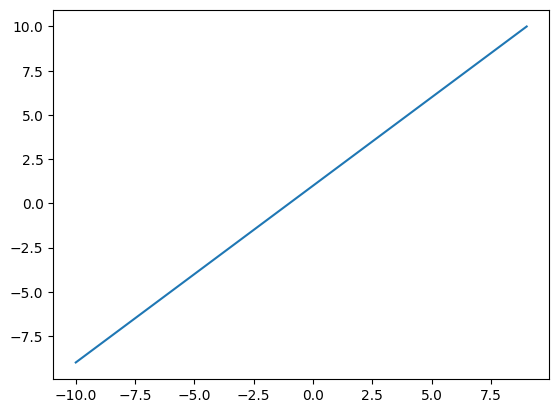

In [5]:
a = 1
b = 1
xs = np.arange(-10,10)
ys = a * xs + b
plt.plot(xs, ys, "-")

If represented as a general parameterized function
$$
  y = f(x; \theta)
$$
- what is $y$?
    - the house price in this example
    - $y$ is the variable we are trying to predict
    - many names: target, regressant, label, dependent variable, etc.
- what is $x$?
    - can be house age for example (single-variable)
    - $x$ is the varaible we are using for prediction
    - many names: feature, regressor, attribute, independent variable, etc.
- what is $\theta$?
    - $\theta = [a, b]^T$
    - $a$: slope
    - $b$: intercept
    - many names: paramters, weights
- what is the data (or data set)?
    - a set of pairs $\mathcal{D} = \{(x_i, y_i)\}_{i=1,\dots,n}$

How to solve it?

$$
    a = \frac{s_{xy}}{s_{xx}}, b = \bar{y} - a\bar{x}
$$

| Meaning           | Notion   | Python |
| :------------------ | :-------:| :-: |
| Sample mean         | $$\bar{x}=\frac{1}{n}\sum_{1}^n x_i$$                    | xm |
| Sample variance     | $$s_{xx}=\frac{1}{n}\sum_{1}^n (x_i-\bar{x})^2$$           | sxx |
| Sample standard deviation | $$s_{x} = \sqrt{s_{xx}}$$ | sx |
| Sample covariance | $$s_{xy} = \frac{1}{n}\sum_{1}^n (x_i-\bar{x})(y_i-\bar{y})$$ | sxy |
| Sample correlation coefficient | $$\rho_{xy} = \frac{s_{xy}}{s_xs_y}$$ | rhoxy |


In [28]:
def single_variable_linear_regression(xs, ys):
    xm = np.mean(xs)
    ym = np.mean(ys)
    sxy = np.mean((xs-xm)*(ys-ym))
    sxx = np.mean((xs-xm)**2)
    a = sxy/sxx
    b = ym - a * xm
    plt.plot(xs, ys, ".")
    plt.plot([min(xs), max(xs)], [a*min(xs)+b,a*max(xs)+b],"-")

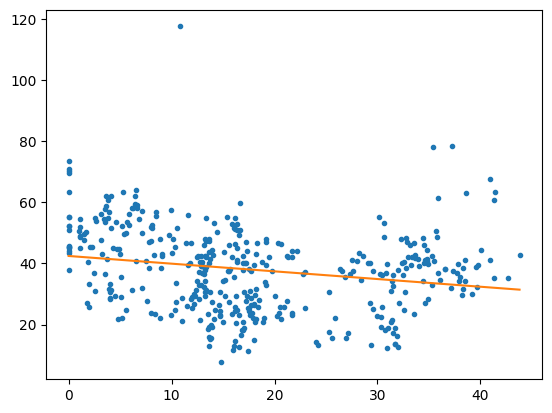

In [29]:
xs = real_estate_data["X2 house age"]
ys = real_estate_data["Y house price of unit area"]
single_variable_linear_regression(xs,ys)

In [34]:
from sklearn import linear_model
def single_variable_linear_regression2(xs, ys):
    model = linear_model.LinearRegression(fit_intercept=True)
    model.fit(xs.reshape(-1,1), ys)
    plt.plot(xs, ys, ".")
    plt.plot(np.sort(xs), model.predict(np.sort(xs).reshape(-1,1)),"-")

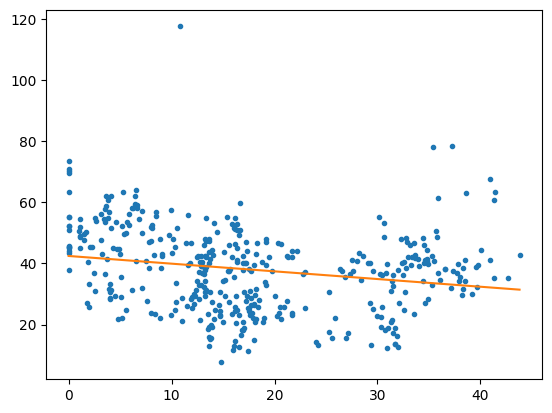

In [35]:
xs = real_estate_data["X2 house age"].to_numpy()
ys = real_estate_data["Y house price of unit area"].to_numpy()
single_variable_linear_regression2(xs,ys)

# WHY?

In [ ]:
## a) What are the sample means, x ̄ and y ̄?

In [ ]:
X = real_estate_data.iloc[:, 1:7]
x_column_name = []
x_sample_mean = []
for i in range(X.shape[1]):
    
    x_column_name.append(X.columns[i])
    x_sample_mean.append(round(np.mean(X.iloc[:, i]), 2))
    
x_mean = pd.DataFrame({"column_name": x_column_name, "mean": x_sample_mean})
x_mean.head()

In [ ]:
round(np.mean(real_estate_data.iloc[:, -1]), 2)